# Vehicle Insurance Fraud Detection- EDA and Model

![Picture title](image-20220921-230548.png)

Problem Statement

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Our Aim

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Import Libraries

In this step we will  first import important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In this step we will import our dataset. 

In [2]:
train=pd.read_csv('/work/train.csv.zip')
test=pd.read_csv('/work/test.csv.zip')

In [3]:
train

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

In [4]:
test

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1         11.0                   1   
1       381111    Male   40                1         28.0                   0   
2       381112    Male   47                1         28.0                   0   
3       381113    Male   24                1         27.0                   1   
4       381114    Male   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142  Female   26                1         37.0                   1   
127033  508143  Female   38                1         28.0                   0   
127034  508144    Male   21                1         46.0                   1   
127035  508145    Male   71                1         28.0                   1   
127036  508146    Male   41                1         29.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0         < 1 Year             No         35786.0                 152.0   
1         1-2 Year            Yes         33762.0                   7.0   
2         1-2 Year            Yes         40050.0                 124.0   
3         < 1 Year            Yes         37356.0                 152.0   
4         < 1 Year             No         59097.0                 152.0   
...            ...            ...             ...                   ...   
127032    < 1 Year             No         30867.0                 152.0   
127033    1-2 Year            Yes         28700.0                 122.0   
127034    < 1 Year             No         29802.0                 152.0   
127035    1-2 Year             No         62875.0                  26.0   
127036    1-2 Year             No         27927.0                 124.0   

        Vintage  
0            53  
1           111  
2           199  
3           187  
4           297  
...         ...  
127032       56  
127033      165  
127034       74  
127035      265  
127036      231  

[127037 rows x 11 columns]

In [5]:
train.shape


(381109, 12)

In [6]:
test.shape

(127037, 11)

In [7]:
#Concatenate train and test data
df = pd.concat([test, train])


In [8]:
df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1         11.0                   1   
1       381111    Male   40                1         28.0                   0   
2       381112    Male   47                1         28.0                   0   
3       381113    Male   24                1         27.0                   1   
4       381114    Male   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0         < 1 Year             No         35786.0                 152.0   
1         1-2 Year            Yes         33762.0                   7.0   
2         1-2 Year            Yes         40050.0                 124.0   
3         < 1 Year            Yes         37356.0                 152.0   
4         < 1 Year             No         59097.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0            53       NaN  
1           111       NaN  
2           199       NaN  
3           187       NaN  
4           297       NaN  
...         ...       ...  
381104       88       0.0  
381105      131       0.0  
381106      161       0.0  
381107       74       0.0  
381108      237       0.0  

[508146 rows x 12 columns]

In [9]:
df.shape

(508146, 12)

Observation:- Shape function depicts that our final dataset contains 508146 rows and 12 columns 

In [10]:
#checking Missing values
df.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [11]:
#Removing unwanted columns
df.drop(['id'],axis=1,inplace=True)

In [12]:
df

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0         Male   25                1         11.0                   1   
1         Male   40                1         28.0                   0   
2         Male   47                1         28.0                   0   
3         Male   24                1         27.0                   1   
4         Male   27                1         28.0                   1   
...        ...  ...              ...          ...                 ...   
381104    Male   74                1         26.0                   1   
381105    Male   30                1         37.0                   1   
381106    Male   21                1         30.0                   1   
381107  Female   68                1         14.0                   0   
381108    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0         < 1 Year             No         35786.0                 152.0   
1         1-2 Year            Yes         33762.0                   7.0   
2         1-2 Year            Yes         40050.0                 124.0   
3         < 1 Year            Yes         37356.0                 152.0   
4         < 1 Year             No         59097.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0            53       NaN  
1           111       NaN  
2           199       NaN  
3           187       NaN  
4           297       NaN  
...         ...       ...  
381104       88       0.0  
381105      131       0.0  
381106      161       0.0  
381107       74       0.0  
381108      237       0.0  

[508146 rows x 11 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508146 non-null  object 
 1   Age                   508146 non-null  int64  
 2   Driving_License       508146 non-null  int64  
 3   Region_Code           508146 non-null  float64
 4   Previously_Insured    508146 non-null  int64  
 5   Vehicle_Age           508146 non-null  object 
 6   Vehicle_Damage        508146 non-null  object 
 7   Annual_Premium        508146 non-null  float64
 8   Policy_Sales_Channel  508146 non-null  float64
 9   Vintage               508146 non-null  int64  
 10  Response              381109 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 46.5+ MB


Observation:- It has been observed from the info function that Region_Code and Response column have Dtype float64 so we will convert Data type of both columns into int64

In [14]:
# To check data is imbalanced or not 
df['Response'].value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

Observation:- Data is highly imbalanced.

In [15]:
df.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          52062
Policy_Sales_Channel      157
Vintage                   290
Response                    2
dtype: int64

Observation :- Lot of missing values  found in the columns such as Annual_Premium,Vintage,Policy_Sales_Channel, Region code and Age

In [16]:
# For checking numeric columns
df.describe()


Age  Driving_License    Region_Code  Previously_Insured  \
count  508146.000000    508146.000000  508146.000000       508146.000000   
mean       38.808413         0.997936      26.406572            0.458667   
std        15.500179         0.045388      13.224921            0.498289   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   508146.000000         508146.000000  508146.000000  381109.000000  
mean     30554.453041            111.975838     154.340123       0.122563  
std      17146.574625             54.246027      83.668793       0.327936  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24381.000000             26.000000      82.000000       0.000000  
50%      31661.000000            133.000000     154.000000       0.000000  
75%      39403.750000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

In [17]:
# displaying the datatypes
display(df.dtypes)
  

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                float64
dtype: object

In [26]:
df.isnull().sum()/508146*100

Gender                   0.000000
Age                      0.000000
Driving_License          0.000000
Region_Code              0.000000
Previously_Insured       0.000000
Vehicle_Age              0.000000
Vehicle_Damage           0.000000
Annual_Premium           0.000000
Policy_Sales_Channel     0.000000
Vintage                  0.000000
Response                25.000098
dtype: float64

In [22]:
!pip install missingno

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [23]:
import missingno as msno

<AxesSubplot:>

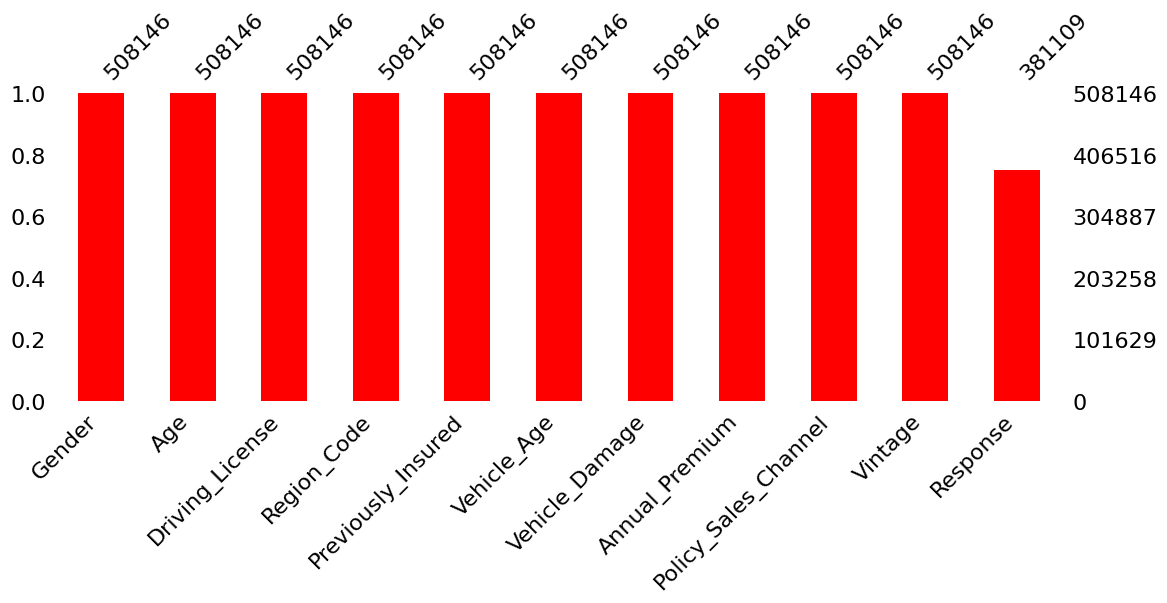

In [24]:
msno.bar(df,figsize=(13,4),color='Red')

# Exploratory Data Analysis

Univariate Analysis

In [ ]:
#Categorical Data


<AxesSubplot:>

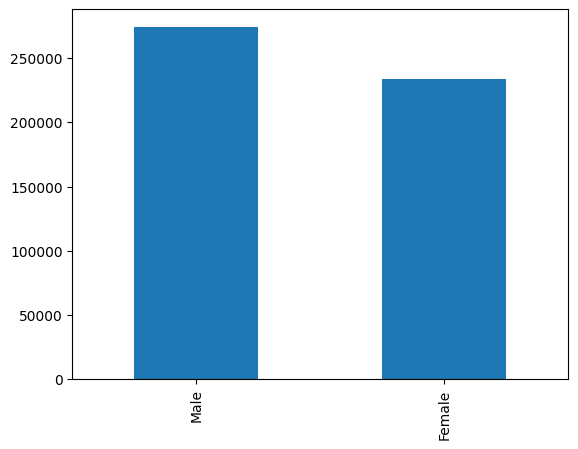

In [27]:

df['Gender'].value_counts().plot(kind='bar')

In [29]:
#On Categorical Data
df['Vehicle_Age'].value_counts().plot(kind='bar')

<AxesSubplot:>

<AxesSubplot:ylabel='Vehicle_Damage'>

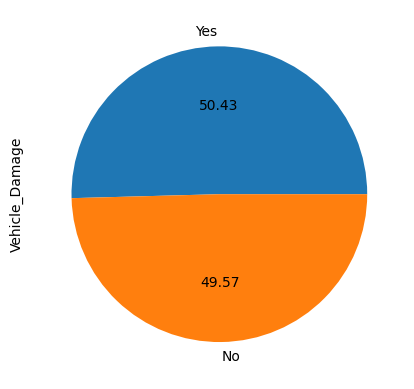

In [31]:
df['Vehicle_Damage'].value_counts().plot(kind='pie',autopct='%.2f')

(array([170852.,  58561.,  49914.,  64024.,  62250.,  35470.,  29790.,
         19594.,  15074.,   2617.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

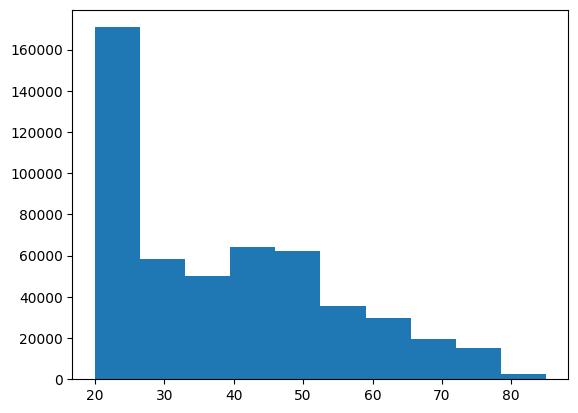

In [32]:
#Numerical Data-Histogram plot
plt.hist(df['Age'])

/tmp/ipykernel_192/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

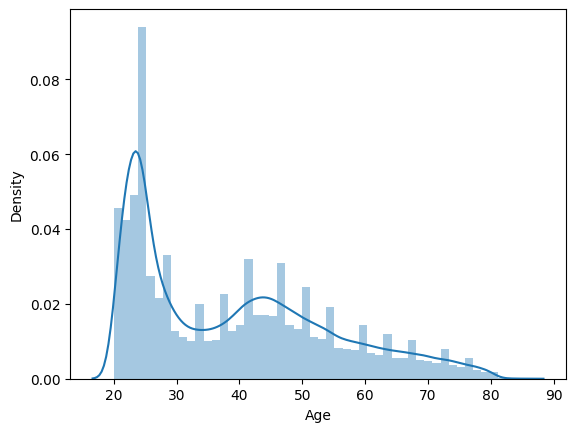

In [33]:
sns.distplot(df['Age'])

In [35]:
sns.boxplot(df['Response'])

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b7ca53f8-ce0c-45ac-a46a-5b2903bda881' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>